In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
os.chdir('/content/drive/MyDrive/Master Thesis/src')
from mnist_utils import load_and_transform_mnist, transform_labels_to_binary
from trainers import *
from plots import *

In [ ]:
os.chdir('/content/drive/MyDrive/Master Thesis')

MNIST_PATH = '/content/drive/MyDrive/datasets'
RESULTS_PATH = os.path.join(os.path.join(os.getcwd(), "results"), "logistic_regression") # unique for each file

In [ ]:
new_dim = 20

criterion = nn.CrossEntropyLoss()

MIN_TRAIN_LOSS = 0.4153611660003662 # for model = LogisticNet(20,10)
MIN_TEST_LOSS = 0.3710212409496307 # for model = LogisticNet(20,10)

def get_net():
    return nn.Sequential(
        nn.Linear(new_dim, 10)
    )

def get_dataset():
    return load_and_transform_mnist(MNIST_PATH, new_dim)

# Cubic Newton

In [ ]:
seed = 0
max_iters = 20
print_every = 1
eval_every = 1
eval_hessian_every = 1
save_spectrum_every = None
save_hessian_every = None
save_every = 20
weight_decay = 0.
# kwargs
M = 1.0
M_min = 1e-8

model_dir = os.path.join(os.path.join(RESULTS_PATH, "CN"), f"seed={seed} M_min={M_min}")
print(f"model_dir: {model_dir}")

torch.manual_seed(seed)
CN_trainer = AdaptiveCubicNewtonTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, M,  M_min)
CN_trainer.load()
print_training_stats(CN_trainer, print_every)
#_ = CN_trainer.train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/logistic_regression/CN/seed=0 M_min=1e-08
     0: train loss =  2.792905, test loss =  2.822232, M =   1.00000000, time =    0.00 sec, lambda_n = -0.000000
     1: train loss =  1.491390, test loss =  1.481264, M =   1.00000000, time =    3.98 sec, lambda_n = -0.000000
     2: train loss =  0.950158, test loss =  0.929200, M =   0.50000000, time =    7.62 sec, lambda_n = -0.000000
     3: train loss =  0.705114, test loss =  0.682234, M =   0.25000000, time =   11.28 sec, lambda_n = -0.000000
     4: train loss =  0.574396, test loss =  0.550828, M =   0.12500000, time =   14.89 sec, lambda_n = -0.000000
     5: train loss =  0.500773, test loss =  0.476935, M =   0.06250000, time =   18.49 sec, lambda_n = -0.000000
     6: train loss =  0.458699, test loss =  0.434966, M =   0.03125000, time =   22.17 sec, lambda_n = -0.000000
     7: train loss =  0.435095, test loss =  0.411890, M =   0.01562500, time =   25.81 sec, lambda_n = 

In [ ]:
print_test_accuracy(CN_trainer)

Best test accuracy: 88.09%
Last test accuracy: 88.08%


# Gradient Descent

In [ ]:
seed = 0
max_iters = 1000
print_every = 100
eval_every = 10
eval_hessian_every = 50
save_spectrum_every = None
save_hessian_every = None
save_every = 1000
weight_decay = 0.
# kwargs
L = 1.0
L_min = 1e-8

model_dir = os.path.join(os.path.join(RESULTS_PATH, "GD"), f"seed={seed} L_min={L_min}")
print(f"model_dir: {model_dir}")

torch.manual_seed(seed)
GD_trainer = AdaptiveGDTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, L, L_min)
GD_trainer.load()
print_training_stats(GD_trainer, print_every)
#_ = GD_trainer.train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/logistic_regression/GD/seed=0 L_min=1e-08
     0: train loss =  2.792905, test loss =  2.822232, L =   1.00000000, time =    0.00 sec, lambda_n = -0.000000
   100: train loss =  0.443288, test loss =  0.419527, L =   0.50000000, time =    3.53 sec, lambda_n = -0.000000
   200: train loss =  0.425298, test loss =  0.402550, L =   1.00000000, time =    7.15 sec, lambda_n = -0.000000
   300: train loss =  0.419198, test loss =  0.397328, L =   2.00000000, time =   10.77 sec, lambda_n = -0.000000
   400: train loss =  0.417228, test loss =  0.395866, L =   0.50000000, time =   14.41 sec, lambda_n = -0.000000
   500: train loss =  0.416384, test loss =  0.395364, L =   1.00000000, time =   17.97 sec, lambda_n = -0.000000
   600: train loss =  0.415986, test loss =  0.395198, L =   0.50000000, time =   21.81 sec, lambda_n = -0.000000
   700: train loss =  0.415766, test loss =  0.395148, L =   0.50000000, time =   25.31 sec, lambda_n = 

In [ ]:
print_test_accuracy(GD_trainer)

Best test accuracy: 88.18%
Last test accuracy: 88.00%


# SGD

In [ ]:
seed = 0
max_iters = 1000
print_every = 100
eval_every = 10
eval_hessian_every = 50
save_spectrum_every = None
save_hessian_every = None
save_every = 1000
weight_decay = 0.
# kwargs
optim_class = torch.optim.SGD
optim_params = {'lr': 0.2}
dataset = get_dataset()
batch_size = 64

model_dir = os.path.join(os.path.join(RESULTS_PATH, "SGD"), f"seed={seed} lr={optim_params['lr']}, batch_size={batch_size}")
print(f"model_dir: {model_dir}")

torch.manual_seed(seed)
SGD_trainer = CustomTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, optim_class, optim_params, batch_size)
SGD_trainer.load()
print_training_stats(SGD_trainer, print_every)
#_ = SGD_trainer.train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/logistic_regression/SGD/seed=0 lr=0.2, batch_size=64
     0: train loss =  2.792905, test loss =  2.822232, time =    0.00 sec, lambda_n = -0.000000
   100: train loss =  0.575681, test loss =  0.551345, time =    0.05 sec, lambda_n = -0.000000
   200: train loss =  0.506712, test loss =  0.485391, time =    0.10 sec, lambda_n = -0.000000
   300: train loss =  0.478814, test loss =  0.453155, time =    0.16 sec, lambda_n = -0.000000
   400: train loss =  0.469827, test loss =  0.446759, time =    0.22 sec, lambda_n = -0.000000
   500: train loss =  0.460146, test loss =  0.431941, time =    0.26 sec, lambda_n = -0.000000
   600: train loss =  0.453729, test loss =  0.429900, time =    0.32 sec, lambda_n = -0.000000
   700: train loss =  0.441613, test loss =  0.417049, time =    0.37 sec, lambda_n = -0.000000
   800: train loss =  0.448926, test loss =  0.424303, time =    0.42 sec, lambda_n = -0.000000
   900: train loss =  0.446

In [ ]:
print_test_accuracy(SGD_trainer)

Best test accuracy: 87.74%
Last test accuracy: 87.21%


# Plots

In [ ]:
metrics = [get_metrics(CN_trainer), get_metrics(GD_trainer), get_metrics(SGD_trainer)]
hessian_metrics = [get_hessian_metrics(CN_trainer), get_hessian_metrics(GD_trainer), get_hessian_metrics(SGD_trainer)]
labels = ["CN", "GD", "SGD"]

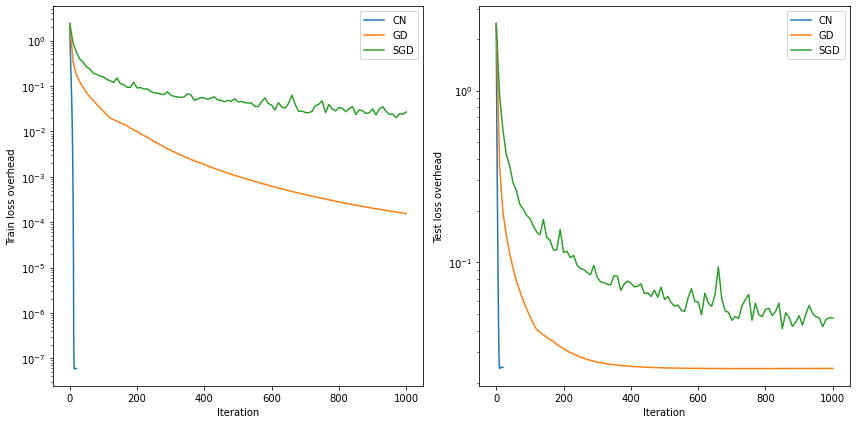

In [ ]:
plot_losses(metrics, labels, MIN_TRAIN_LOSS, MIN_TEST_LOSS)

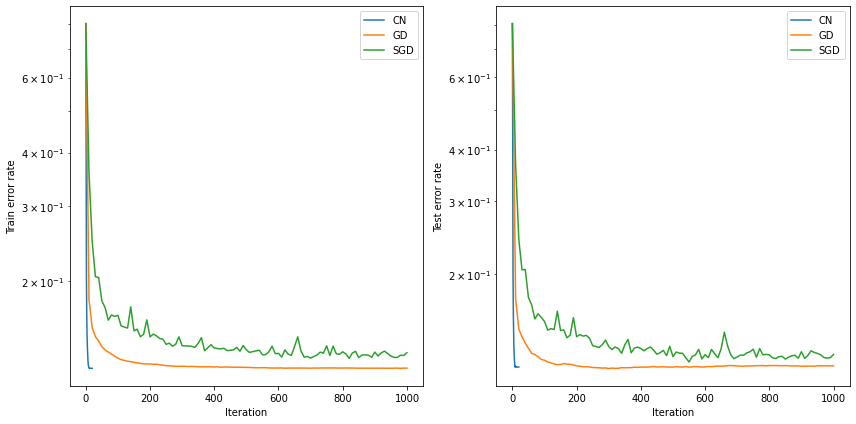

In [ ]:
plot_errors(metrics, labels)

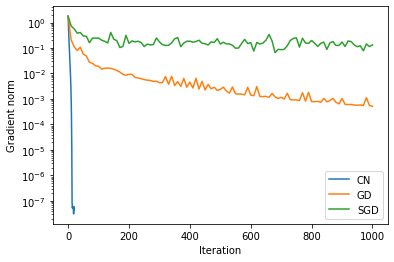

In [ ]:
plot_grad_norms(metrics, labels)

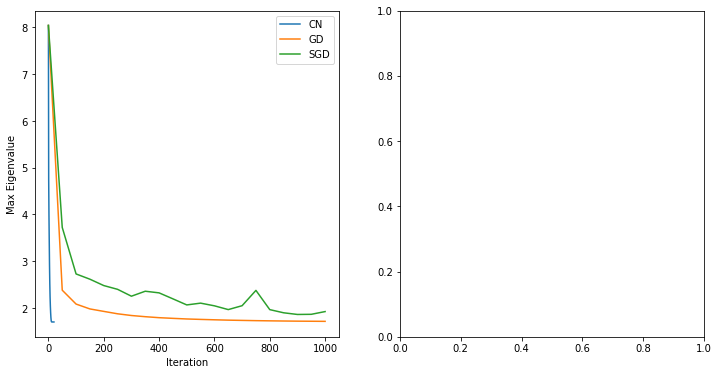

In [ ]:
plot_max_min_eigvals(hessian_metrics, labels, plot_min_eigval=False)

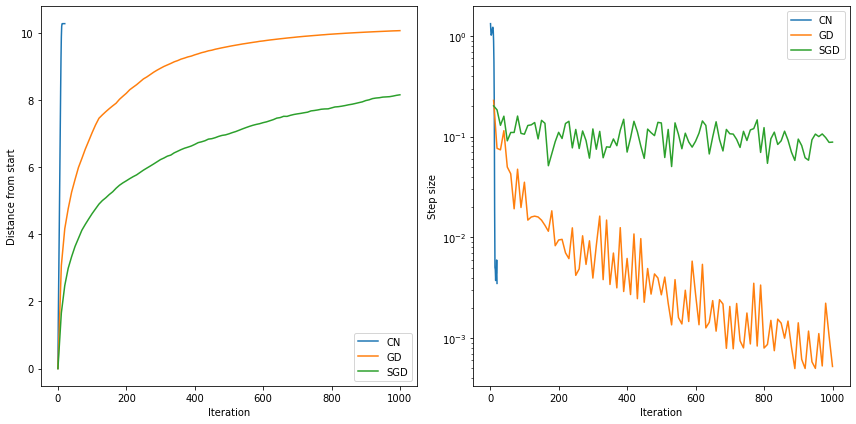

In [ ]:
plot_distances(metrics, labels)